In [1]:
import sys
for p in ['..']:
  if p not in sys.path:
    sys.path.insert(0, p)

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.display import HTML

from digits.data import Env
from digits.explore import *

%matplotlib inline

env = Env('..')
env.assert_ready()
print("ready")

ready


In [2]:
model = 'tf'
variant = 'mnist'
e = explore(env, model, variant, 'test', assert_complete=True)

In [3]:
e.metrics.accuracy()

0.81621428571428567

In [4]:
e.metrics.gold_class_dist()

array([ 0.102     ,  0.11228571,  0.09971429,  0.1045    ,  0.10057143,
        0.08635714,  0.09678571,  0.1015    ,  0.19628571])

In [5]:
e.metrics.pred_class_dist()

array([ 0.1045    ,  0.12742857,  0.08785714,  0.08971429,  0.11328571,
        0.08935714,  0.12328571,  0.10692857,  0.15764286])

In [6]:
HTML(viz_table(e.viz.wrong_certain))

,index,gold_class,pred_class,p,entropy,proc_image
0,13823,7,0,0.989547,0.058458,
1,2365,3,2,0.989963,0.067199,
2,10687,6,0,0.986309,0.077898,
3,13413,9,0,0.986114,0.085100,
4,13851,9,0,0.981274,0.097431,
5,9494,2,6,0.982298,0.105557,
6,7943,2,6,0.981283,0.107055,
7,12088,2,6,0.980613,0.113058,
8,2676,2,6,0.974518,0.141830,
9,12398,2,0,0.973152,0.144222,


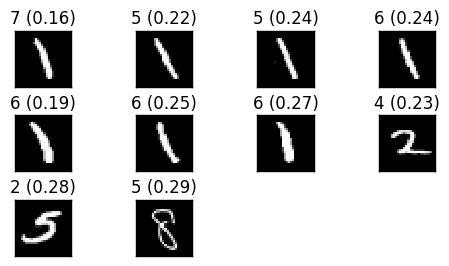

In [7]:
plot_images(e.viz.wrong_uncertain, lambda r: '%d (%.2f)' % (r.pred_class, r.p), lambda r: r.proc_image, show=True)

In [8]:
e.learning_curve.head()

,step,seen,train_acc,train_loss,valid_acc,valid_loss
0,0,0,0.100,3.24185,0.100,3.23519
1,25,2500,0.100,2.36961,0.100,2.36969
2,50,5000,0.100,2.34469,0.100,2.34317
3,75,7500,0.230,2.33303,0.215,2.33338
4,100,10000,0.275,2.32192,0.255,2.31054


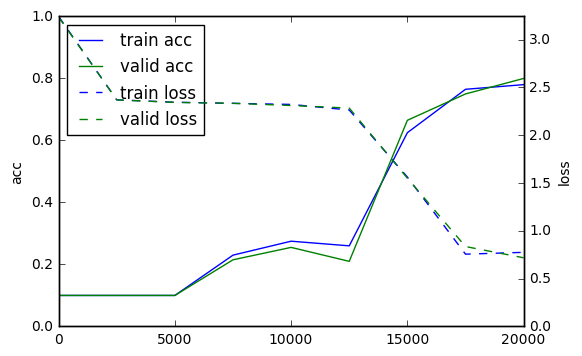

In [9]:
plot_learning(e.learning_curve, show=True)

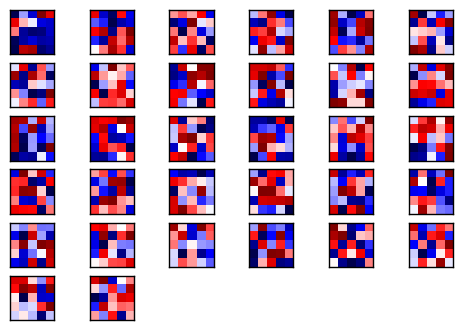

In [10]:
plot_weights(e.conv_weights, 0, show=True)